<a href="https://colab.research.google.com/github/ameernayman/Sensitive_image_classification/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sensitive Data classification for text

##  This model run in google colab https://colab.research.google.com/

In [124]:
import tensorflow as tf
import json
import os
import random
import numpy

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [125]:

text_folder = "/content/Sensitive_image_classification"
if os.path.exists(text_folder) == False:
  !git clone https://github.com/ameernayman/Sensitive_image_classification.git

dataset_text = text_folder + "/dataset_text/"
sensitive_json = "data_sensitive.json"
nonsensitive_json = "data_nonsensitive.json"

### Text model Preprocessing the dataset

In [126]:
textData = []
textSentences = []
textLabels = []
size_training = 20000
stopwords_text = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

def load_data(filename):
  with open(dataset_text + filename, 'r') as f:
      data_store = json.load(f)
  for value in data_store:
    textSentences = value['data']
    textLabels = value['is_sensitive']
    for wrd in stopwords_text: 
      token = " " + wrd + " "
      textSentences = textSentences.replace(token, " ")
    textData.append([textSentences, textLabels])


load_data(sensitive_json)
load_data(nonsensitive_json)

random.shuffle(textData)


for item in textData:
  textSentences.append(item[0])
  textLabels.append(item[1])


training_snt_text= textSentences[0:size_training]
validation_snt_text = textSentences[size_training:]
training_lbls_text = textLabels[0:size_training]
validation_lbls_text = textLabels[size_training:]

print("Size of Training Data set is: ", len(training_snt_text))
print("Training Data Sample:", training_snt_text[0])
print("Size of Validation Data set is: ", len(validation_snt_text))
print("Validation Sample:", validation_snt_text[0])

Size of Training Data set is:  20000
Training Data Sample: The movie begins Jack Dobson, homicide detective Palm Beach, flat back bullet chest. The movie told flashback form, leading events led fate.
Jack receiving threatening letters. He partner Steve Frayn conclude source must mob figure Jack testify court. But another possibility someone causing trouble Jack's brother, Michael, election campaign public office.
Women begin turning dead lipstick traces left killer. A woman Jack begun seeing, Ellen Schofield, involved. But Ellen sees Jack leave restaurant woman soon becomes victim, suspicion cast toward Jack killer. Jack eventually reveals raped child former 1st grade teacher, Gloria Wurtz. While speaking Michael, Steve learns mother raped Jack. Steve decides go forward investigation but, process, winds sex Ellen, much wife's (who earlier celebrated seventh wedding anniversary with) Jack's (who now sees traitor) dismay. After Ellen turns dead, Jack decides take Beth (Steve's wife) secl

# Creating training, validation sequence and labels 

In [127]:

type_trunc='post'
padding='post'
out_of_vocb = "<OOV>"

length_text = 60
size_vocab = 3000
tknizer = Tokenizer(num_words=size_vocab, oov_token=out_of_vocb)

tknizer.fit_on_texts(training_snt_text)

index_words = tknizer.word_index
print("Size of word index:", len(index_words))

with open("word_index.json", "w") as outfile:  
    json.dump(index_words, outfile)
    print("Saving the word index as JSON")


training_squnce = tknizer.texts_to_sequences(training_snt_text)
padding_Tdataset = pad_sequences(training_squnce, maxlen=length_text, padding=padding, truncating=type_trunc)


validation_squnce = tknizer.texts_to_sequences(validation_snt_text)
padding_Vdataset = pad_sequences(validation_squnce, maxlen=length_text, padding=padding, truncating=type_trunc)
padding_Tdataset = numpy.array(padding_Tdataset)
training_lbls_text = numpy.array(training_lbls_text)
padding_Vdataset = numpy.array(padding_Vdataset)
validation_lbls_text = numpy.array(validation_lbls_text)

Size of word index: 102828
Saving the word index as JSON


## Sequential Model Using Conv1D, GlobalPooling, and with Dense layer

In [128]:

dimensions = 32
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(size_vocab, dimensions, input_length=length_text),
    tf.keras.layers.Conv1D(64, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 60, 32)            96000     
                                                                 
 conv1d_13 (Conv1D)          (None, 56, 64)            10304     
                                                                 
 global_average_pooling1d_13  (None, 64)               0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_26 (Dense)            (None, 24)                1560      
                                                                 
 dense_27 (Dense)            (None, 1)                 25        
                                                                 
Total params: 107,889
Trainable params: 107,889
Non-trainable params: 0
_______________________________________________

# Callback function to aviod overfitting

In [129]:
no_epochs = 6
ACCURACY = 0.999
class myEpoch(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > ACCURACY:
      print(" Accurracy is 0.99 then cancel the epoch")
      self.model.stop_training = True

epoch_callbacks = myEpoch()


## Valdation and Training model fitting


In [130]:

text_his = model.fit(padding_Tdataset, 
                    training_lbls_text, 
                    epochs=no_epochs, 
                    validation_data=(
                        padding_Vdataset, 
                        validation_lbls_text), 
                    verbose=1,
                    callbacks=[epoch_callbacks])

Epoch 1/6
625/625 [==============================] - 8s 12ms/step - loss: 0.0595 - accuracy: 0.9916 - val_loss: 0.0053 - val_accuracy: 0.9982
Epoch 2/6
625/625 [==============================] - 7s 12ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0019 - val_accuracy: 0.9993


## Plotting Accuracy and Loss graph for Text Model

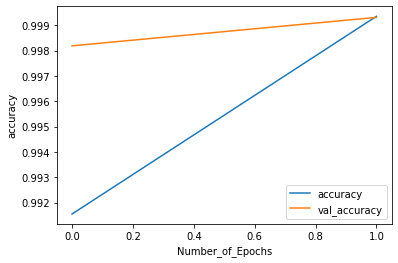

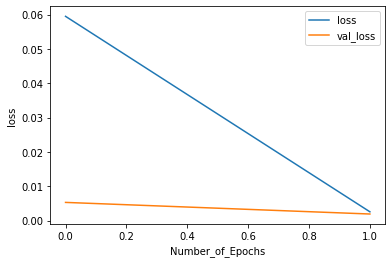

In [132]:
import matplotlib.pyplot as plot


def graphsPlot(text_his, str):
  plot.plot(text_his.history[str])
  plot.plot(text_his.history['val_'+str])
  plot.xlabel("Number_of_Epochs")
  plot.ylabel(str)
  plot.legend([str, 'val_'+str])
  plot.show()
  
graphsPlot(text_his, "accuracy")
graphsPlot(text_his, "loss")

# Ploting the Confusion Matrix

Accuracy for 8682 Test Data =  99.91937341626354
Accuracy for 11576 Test Data =  99.93089149965446
Accuracy for 14470 Test Data =  99.93089149965446
Accuracy for 17364 Test Data =  99.93089149965446


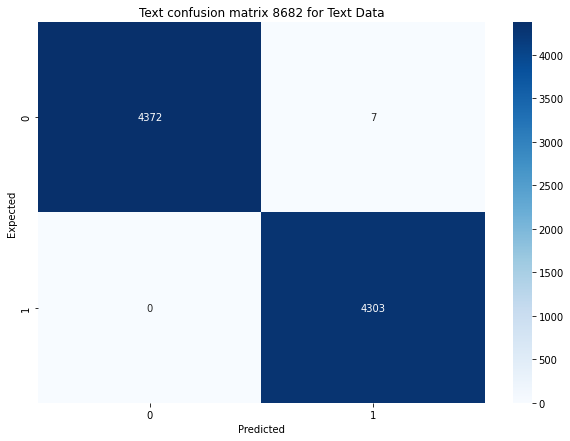

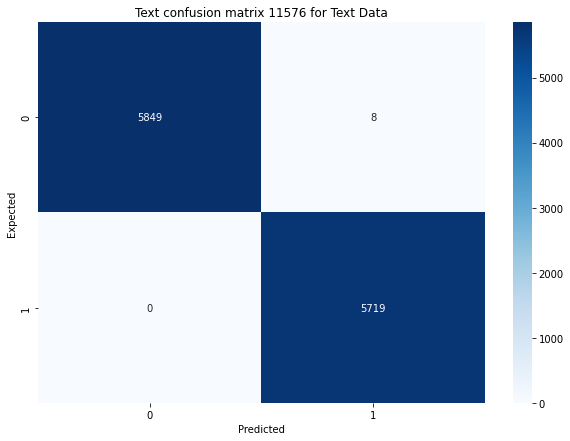

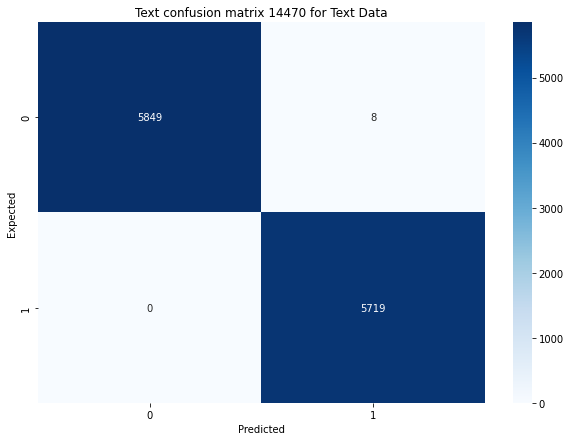

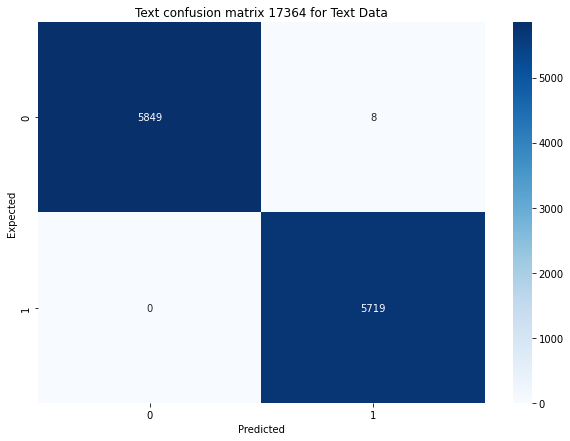

In [133]:
import seaborn

text_predicted = model.predict(padding_Vdataset)
predicted_text_labels = text_predicted > 0.5

size = numpy.size(predicted_text_labels)
predicted_text_labels = predicted_text_labels.reshape(size, )

for num in range (3, 7):
  count = num * size // 4
  text_matrix = tf.math.confusion_matrix(labels=validation_lbls_text[0:count],predictions=predicted_text_labels[0:count])

  confusion_matrix = text_matrix.numpy()
  conf_acc = (confusion_matrix[0, 0] + confusion_matrix[1, 1])/ numpy.sum(confusion_matrix) * 100
  print("Accuracy for", str(count), "Test Data = ", conf_acc)

  plot.figure(figsize = (10,7))
  seaborn.heatmap(text_matrix, annot=True, fmt='d', cmap='Blues')
  plot.title("Text confusion matrix " + str(count) + " for Text Data")
  plot.xlabel('Predicted')
  plot.ylabel('Expected')

## Experiment

In [143]:

list_sntnc = ["My name is Ameer Hussain Nayman", "Credit card number is 99111","congratulations, I got a job", "cup of tea season 8 release is on Sunday"]
txt_seq = tknizer.texts_to_sequences(list_sntnc)
text_pad = pad_sequences(txt_seq, maxlen=length_text, padding=padding, truncating=type_trunc)
text_prediction = model.predict(text_pad)
print("OUTPUT : Text sensitive and non-sensitive"+"\n")
for val in range(len(text_prediction)):
  print(text_prediction[val][0])
  if text_prediction[val][0]>0.5:
    print("Text is sensitive - "+ list_sntnc[val])
  else:
    print("Text is non-nensitive - " + list_sntnc[val] )

OUTPUT : Text sensitive and non-sensitive

0.968835
Text is sensitive - My name is Ameer Hussain Nayman
0.99842286
Text is sensitive - Credit card number is 99111
0.27488485
Text is non-nensitive - congratulations, I got a job
0.4460554
Text is non-nensitive - cup of tea season 8 release is on Sunday
